In [1]:
# Import section libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.pyplot import rcParams
from statsmodels.tsa.stattools import adfuller

In [2]:
# Some settings

# PATH

PATH = '../../Raw Data sets/Sauti Africa Market Monitoring/wfpvam_foodprices.csv'

# Size of plottings

rcParams['figure.figsize'] = 10,6

In [3]:
prices = pd.read_csv(PATH)

C:\Users\jcm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [5]:
set(prices['adm0_name'])

{'Afghanistan',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bassas da India',
 'Belarus',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Honduras',
 'Indonesia',
 'Iran  (Islamic Republic of)',
 'Iraq',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mexico',
 'Moldova Republic of',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Panama',
 'Par

In [6]:
# East African Community (EAC)

eac = ['Burundi', 'Kenya', 'United Republic of Tanzania', 'Rwanda', 'Uganda', 'South Sudan']

new_prices = pd.DataFrame(columns=prices.columns)

for country in eac:
  new_prices = pd.concat([new_prices,prices[prices['adm0_name'] == country]])


prices = new_prices
prices.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
183916,43.0,Burundi,40542,Bubanza,1827,Musenyi,50,Beans - Retail,0.0,BIF,15,Retail,5,KG,10,2014,1244.6666,NaN
183917,43.0,Burundi,40542,Bubanza,1827,Musenyi,50,Beans - Retail,0.0,BIF,15,Retail,5,KG,11,2014,1080.0000,NaN
183918,43.0,Burundi,40542,Bubanza,1827,Musenyi,50,Beans - Retail,0.0,BIF,15,Retail,5,KG,12,2014,1025.0000,NaN
183919,43.0,Burundi,40542,Bubanza,1827,Musenyi,50,Beans - Retail,0.0,BIF,15,Retail,5,KG,1,2015,883.2500,NaN
183920,43.0,Burundi,40542,Bubanza,1827,Musenyi,50,Beans - Retail,0.0,BIF,15,Retail,5,KG,2,2015,850.0000,NaN


In [7]:
set(prices['cm_name'])

{'Apples (red) - Retail',
 'Avocados - Retail',
 'Bananas - Retail',
 'Beans (dry) - Retail',
 'Beans (dry) - Wholesale',
 'Beans (fresh) - Retail',
 'Beans (green, fresh) - Retail',
 'Beans (red) - Retail',
 'Beans - Retail',
 'Beans - Wholesale',
 'Bread - Retail',
 'Cabbage - Retail',
 'Carrots - Retail',
 'Cassava (dry) - Retail',
 'Cassava - Retail',
 'Cassava flour - Retail',
 'Cassava flour - Wholesale',
 'Cassava leaves - Retail',
 'Cauliflower - Retail',
 'Charcoal - Retail',
 'Chili (red) - Retail',
 'Cucumbers (greenhouse) - Retail',
 'Eggplants - Retail',
 'Eggs - Retail',
 'Exchange rate (unofficial) - Retail',
 'Exchange rate - Retail',
 'Fish (dry) - Retail',
 'Fish (lates,dry,imported) - Retail',
 'Fish (lates,dry,local) - Retail',
 'Fuel (diesel) - Retail',
 'Fuel (diesel, parallel market) - Retail',
 'Fuel (kerosene) - Retail',
 'Fuel (petrol-gasoline) - Retail',
 'Fuel (petrol-gasoline, parallel market) - Retail',
 'Garlic - Retail',
 'Groundnuts (shelled) - Retail',

In [8]:
# I'm choosing just Maize to begin

retail_maize = prices[prices['cm_name'] == 'Maize - Retail']

retail_maize

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
937996,205.0,Rwanda,2587,Kigali City/Umujyi wa Kigali,1054,Gahanga,51,Maize - Retail,0.0,RWF,15,Retail,5,KG,7,2010,107.5000,NaN
937997,205.0,Rwanda,2587,Kigali City/Umujyi wa Kigali,1054,Gahanga,51,Maize - Retail,0.0,RWF,15,Retail,5,KG,8,2010,121.6667,NaN
937998,205.0,Rwanda,2587,Kigali City/Umujyi wa Kigali,1054,Gahanga,51,Maize - Retail,0.0,RWF,15,Retail,5,KG,9,2010,108.7500,NaN
937999,205.0,Rwanda,2587,Kigali City/Umujyi wa Kigali,1054,Gahanga,51,Maize - Retail,0.0,RWF,15,Retail,5,KG,10,2010,177.5000,NaN
938000,205.0,Rwanda,2587,Kigali City/Umujyi wa Kigali,1054,Gahanga,51,Maize - Retail,0.0,RWF,15,Retail,5,KG,11,2010,181.2500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283853,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,7,2018,650.0000,NaN
1283854,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,8,2018,520.0000,NaN
1283855,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,9,2018,600.0000,NaN
1283856,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,10,2018,600.0000,NaN


In [9]:
# Narrowing to Lira Market of Uganda.

retail_maize[(retail_maize['adm0_name'] == 'Uganda') & (retail_maize['adm1_name'] == 'Lira')]

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
1283763,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,1,2010,700.00,NaN
1283764,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,2,2010,709.09,NaN
1283765,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,3,2010,521.43,NaN
1283766,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,4,2010,483.33,NaN
1283767,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,5,2010,462.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283853,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,7,2018,650.00,NaN
1283854,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,8,2018,520.00,NaN
1283855,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,9,2018,600.00,NaN
1283856,253.0,Uganda,47082,Lira,263,Lira,51,Maize - Retail,0.0,UGX,15,Retail,5,KG,10,2018,600.00,NaN


In [10]:
# Getting the 

rm_uganda_lira = retail_maize[(retail_maize['adm0_name'] == 'Uganda') & (retail_maize['adm1_name'] == 'Lira')][['mp_month','mp_year','mp_price']]
rm_uganda_lira['dates'] = pd.to_datetime({'year': rm_uganda_lira['mp_year'], 'month':rm_uganda_lira['mp_month'], 'day':np.ones(len(rm_uganda_lira))})
rm_uganda_lira = rm_uganda_lira[['mp_price','dates']]
rm_uganda_lira = rm_uganda_lira.set_index(['dates'])
display(rm_uganda_lira.head())
display(rm_uganda_lira.tail())

,mp_price
dates,
2010-01-01,700.00
2010-02-01,709.09
2010-03-01,521.43
2010-04-01,483.33
2010-05-01,462.50


,mp_price
dates,
2018-07-01,650.0
2018-08-01,520.0
2018-09-01,600.0
2018-10-01,600.0
2018-11-01,700.0


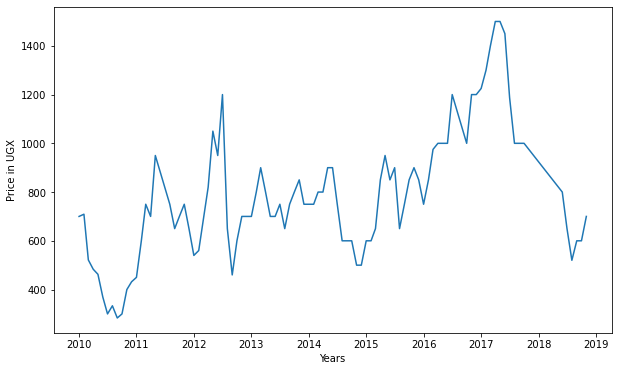

In [11]:
plt.plot(rm_uganda_lira)
plt.xlabel('Years')
plt.ylabel('Price in UGX')
plt.show()

In [12]:
rolmean = rm_uganda_lira.rolling(window=12).mean()
rolstd = rm_uganda_lira.rolling(window=12).std()

display(rolmean,rolstd)

,mp_price
dates,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
...,...
2018-07-01,1167.708333
2018-08-01,1108.958333
2018-09-01,1050.625000


,mp_price
dates,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,NaN
2010-05-01,NaN
...,...
2018-07-01,280.140911
2018-08-01,335.490581
2018-09-01,359.267128


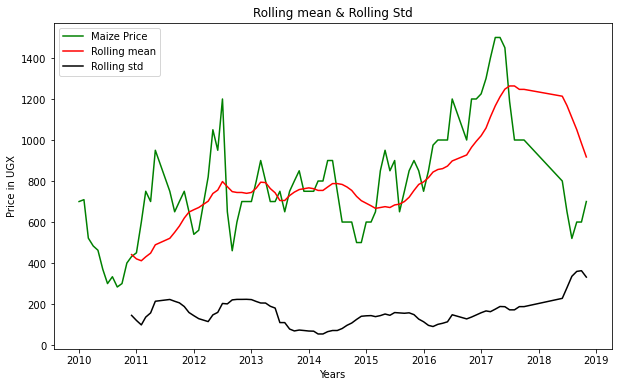

In [13]:

timeseries_prices = plt.plot(rm_uganda_lira, color = 'green', label = 'Maize Price')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Rolling std')
# upper_band = plt.plot(rolmean + 2 * rolstd, color='red', label='Crisis band')
# lower_band = plt.plot(rolmean + 1.5 * rolstd, color='orange', label='Alert mean')
plt.legend(loc='best')
plt.title('Rolling mean & Rolling Std')
plt.xlabel('Years')
plt.ylabel('Price in UGX')
plt.show()

In [ ]:
# Augmented Dickey-Fuller test


'''
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root is that it determines how strongly a time series is defined by a trend.
'''


result_adft = adfuller(rm_uganda_lira)
print(f'ADF Statistic: {round(result_adft[0],4)}')
print(f'p-value: {round(result_adft[1],4)}')
print('Critical Values:')
for key, value in result_adft[4].items():
    print(f'{key}: {round(value,4)}')

We got a negative statistic. The more negative, the more likely to reject the null hypothesis, this mean,
the data has a unit root and is non-stationary. It has some time dependency.

# Draft

In [67]:
# Special libraries import section

from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder

In [30]:
month_rolmean = rm_uganda_lira.rolling(window=12).mean()
month_rolstd = rm_uganda_lira.rolling(window=12).std()

# display(rm_uganda_lira)
month_rolmean = month_rolmean.dropna()[:-1].set_index(rm_uganda_lira.index[12:])
month_rolstd = month_rolstd.dropna()[:-1].set_index(rm_uganda_lira.index[12:])

In [31]:
month_rolmean

,mp_price
dates,
2011-01-01,441.171667
2011-02-01,420.338333
2011-03-01,411.247500
2011-04-01,430.295000
2011-05-01,448.350833
...,...
2018-07-01,1213.541667
2018-08-01,1167.708333
2018-09-01,1108.958333


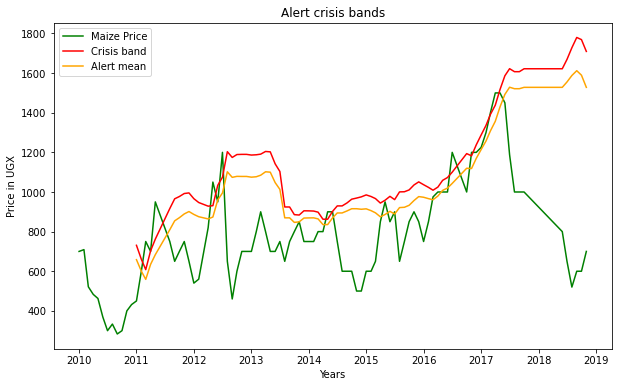

In [32]:
timeseries_prices = plt.plot(rm_uganda_lira, color = 'green', label = 'Maize Price')
upper_band = plt.plot(month_rolmean + 2 * month_rolstd, color='red', label='Crisis band')
lower_band = plt.plot(month_rolmean + 1.5 * month_rolstd, color='orange', label='Alert mean')
plt.legend(loc='best')
plt.title('Alert crisis bands')
plt.xlabel('Years')
plt.ylabel('Price in UGX')
plt.savefig('alert_crisis_bands_test.png')
plt.show()


### Experimenting WPF's Alert for Price Spikes (ALPS) Indicator

In [184]:
# Estimating the trend
X = retail_maize[(retail_maize['adm0_name'] == 'Uganda') & (retail_maize['adm1_name'] == 'Lira')][['mp_month','mp_year','mp_price']].reset_index(drop=True)
X['dates'] = pd.to_datetime({'year': X['mp_year'], 'month':X['mp_month'], 'day':np.ones(len(X))})
X['diff_price'] = X['mp_price'].diff(12)
X = X.drop(labels=range(12), axis=0)
X = X.set_index('dates', drop=False)
X.head()

,mp_month,mp_year,mp_price,dates,diff_price
dates,,,,,
2011-01-01,1,2011,450.0,2011-01-01,-250.00
2011-02-01,2,2011,600.0,2011-02-01,-109.09
2011-03-01,3,2011,750.0,2011-03-01,228.57
2011-04-01,4,2011,700.0,2011-04-01,216.67
2011-05-01,5,2011,950.0,2011-05-01,487.50


In [128]:
reg = LinearRegression(normalize=True)

features = ['dates']

target = 'diff_price'

reg.fit(X[features],X[target])
print(reg.coef_)
print(reg.intercept_)

[-1.07964065e-15]
1592.5764822889248


In [154]:
def dommie_coef():
    
    coefficients = []
    
    for i in range(1,13):
        reg = LinearRegression(normalize=True)

        dataframe = X[X['mp_month'] == i]

        features = ['dates']

        target = 'diff_price'

        reg.fit(dataframe[features],dataframe[target])

        coefficients.append(reg.coef_[0])
    return coefficients

In [155]:
dommie_coef()

[1.7484516860186002e-15,
 1.7100981041407333e-15,
 1.3491602388018406e-15,
 1.0527398112035864e-15,
 -3.2543647177365047e-16,
 -5.088023806209086e-16,
 -1.7819594186988394e-15,
 -2.5192291040292064e-15,
 -3.096996593576285e-15,
 -2.6467327292180537e-15,
 -3.177374905800813e-15,
 8.141194017045889e-16]

In [185]:
X_jan = X[X['mp_month'] == 1]

X_jan['mp_price'] = X_jan[['mp_price']].ewm(halflife=2).mean()

reg = LinearRegression(normalize=True)

features = ['dates']

target = 'mp_price'

reg.fit(X_jan[features],X_jan[target])
print(reg.coef_)

[1.79399889e-15]


C:\Users\jcm\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
X_jul = X[X['mp_month'] == 7]

reg = LinearRegression(normalize=True)

features = ['dates']

target = 'diff_price'

reg.fit(X_jul[features],X_jul[target])
print(reg.coef_)

[-1.78195942e-15]


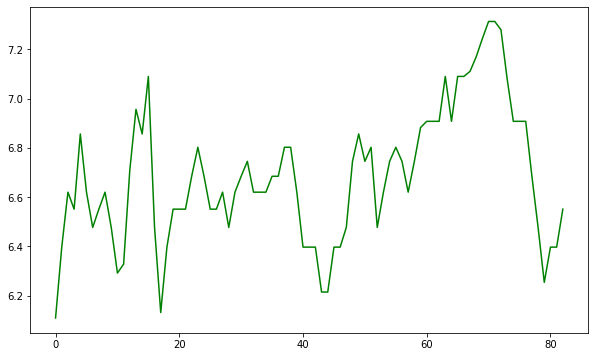

In [158]:
plt.plot(np.log(X['mp_price']), color = 'green', label = 'Maize Price')

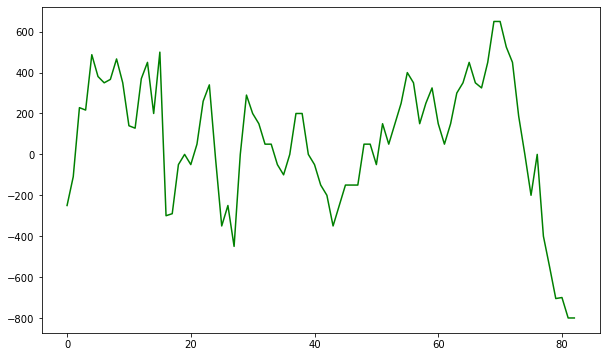

In [160]:
plt.plot(X['diff_price'], color = 'green', label = 'Maize Price')

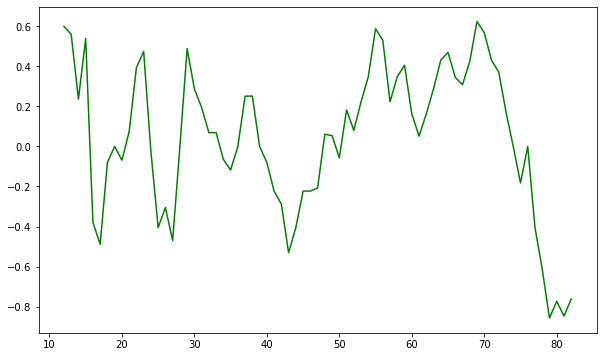

In [165]:
plt.plot(np.log(X['mp_price']).diff(12), color = 'green', label = 'Maize Price')

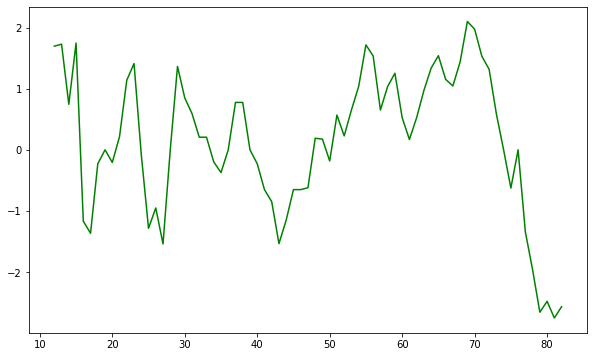

In [164]:
plt.plot(np.cbrt(X['mp_price']).diff(12), color = 'green', label = 'Maize Price')

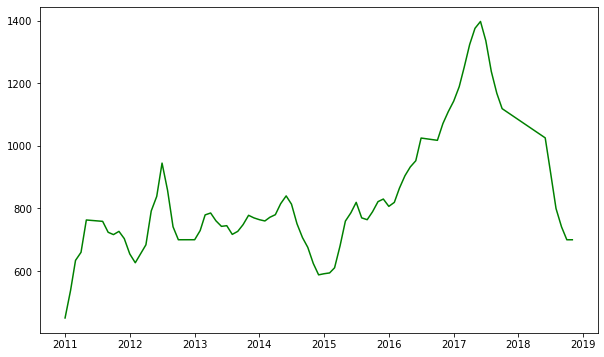

In [178]:
plt.plot(X[['mp_price']].ewm(halflife=2).mean(), color = 'green', label = 'Maize Price')